<a href="https://colab.research.google.com/github/m-manuelmussa/Desenvolvimento-de-modelos-de-machine-learning-para-predizer-novos-inibidores-da-TK-HER2/blob/main/3_EDA_TKI_HER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Desenvolvimento de modelos de machine learning baseados em QSAR-3D para a predição de novos candidatos a fármacos TKI-HER2 para o tratamento de câncer da mama***

---



***Autor: Micliete_Mussa***

### ***2. Machine Learning & QSAR-3D***

### ***2.3. Análise exploratória dos TKI-HER2***

### **Pipeline**
1. Configuração do ambiente de trabalho
2. Carregamento dos dados em .csv
3. Realização da estatística descritiva
4. Aplicação do teste de normalidade dos dados
5. Execução do teste de Mann–Whitney U (teste não-paramétrico)
6. Gráfico A - Boxplot: aceitadores de H vs classe
7. Gráfico B - Boxplot: doadores de H vs classe
8. Gráfico C - Dispersão: LogP vs Massa Molecular
9. Gráfico D - Boxplot: LogP vs classe

### ***1. Configuração do ambiente de trabalho***

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### ***2. Carregamento dos dados em .csv***

In [9]:
df_final = pd.read_csv("Dados para EDA.csv")

### ***3. Realização da estatística descritiva***

In [10]:
# Estatísticas descritivas por classe
df_final.groupby('Classe')[['MolLogP', 'MolWt', 'nHBDon', 'nHBAcc']].describe()

MolLogP                                                         \
         count      mean       std      min      25%     50%      75%   
Classe                                                                  
0        895.0  4.315533  1.729127 -10.3261  3.27585  4.3081  5.37670   
1       1799.0  5.143669  1.693393  -1.0763  4.11430  5.0699  6.29338   

                  MolWt              ... nHBDon        nHBAcc            \
            max   count        mean  ...    75%   max   count      mean   
Classe                               ...                                  
0       10.4437   895.0  419.618655  ...    2.0  36.0   895.0  5.349721   
1       11.9379  1799.0  533.083533  ...    2.0   8.0  1799.0  7.640912   

                                            
             std  min  25%  50%  75%   max  
Classe                                      
0       2.576250  0.0  3.0  5.0  7.0  36.0  
1       1.916504  2.0  6.0  8.0  9.0  18.0  

[2 rows x 32 columns]

### ***4. Aplicação do teste de normalidade dos dados***

In [11]:
#Verificar normalidade com Shapiro-Wilk
# Rotular a classe de bioactividade
df_final['classe_bioatividade'] = df_final['Classe'].map({1: 'Ativo', 0: 'Inativo'})

# Separar grupos
ativos = df_final[df_final['classe_bioatividade'] == 'Ativo']
inativos = df_final[df_final['classe_bioatividade'] == 'Inativo']

In [21]:
for coluna in ['MolLogP', 'nHBDon', 'nHBAcc']:
    print(f"\nTeste de normalidade para '{coluna}':")
    stat_ativo, p_ativo = stats.shapiro(ativos[coluna])
    stat_inativo, p_inativo = stats.shapiro(inativos[coluna])
    print(f"Ativos: p={p_ativo:.4f} {'(normal)' if p_ativo>0.05 else '(não normal)'}")
    print(f"Inativos: p={p_inativo:.4f} {'(normal)' if p_inativo>0.05 else '(não normal)'}")


Teste de normalidade para 'MolLogP':
Ativos: p=0.0000 (não normal)
Inativos: p=0.0000 (não normal)

Teste de normalidade para 'nHBDon':
Ativos: p=0.0000 (não normal)
Inativos: p=0.0000 (não normal)

Teste de normalidade para 'nHBAcc':
Ativos: p=0.0000 (não normal)
Inativos: p=0.0000 (não normal)


### ***5. Execução do teste de Mann–Whitney U (teste não-paramétrico)***

In [13]:
#Executar teste Mann–Whitney U para cada variável (teste não paramêtrico)
for coluna in ['MolLogP', 'nHBDon', 'nHBAcc']:
    stat, p = stats.mannwhitneyu(ativos[coluna], inativos[coluna], alternative='two-sided')
    print(f"\nComparando '{coluna}' entre ativos e inativos:")
    print(f"Mann-Whitney U: estatística={stat:.2f}, p-valor={p:.4f}")
    if p < 0.05:
        print("Diferença estatisticamente significativa (p < 0.05)")
    else:
        print("Não houve diferença significativa (p ≥ 0.05)")


Comparando 'MolLogP' entre ativos e inativos:
Mann-Whitney U: estatística=1033883.50, p-valor=0.0000
Diferença estatisticamente significativa (p < 0.05)

Comparando 'nHBDon' entre ativos e inativos:
Mann-Whitney U: estatística=1064444.50, p-valor=0.0000
Diferença estatisticamente significativa (p < 0.05)

Comparando 'nHBAcc' entre ativos e inativos:
Mann-Whitney U: estatística=1244606.00, p-valor=0.0000
Diferença estatisticamente significativa (p < 0.05)


### ***6. Gráfico A - Boxplot: aceitadores de H vs classe***

In [14]:
#Definir estilo visual inspirado na imagem
sns.set(style="white", font_scale=1.1)
custom_palette = {'Ativo': '#4C72B0', 'Inativo': '#DD8452'}

/tmp/ipython-input-17-1282564517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipython-input-17-1282564517.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


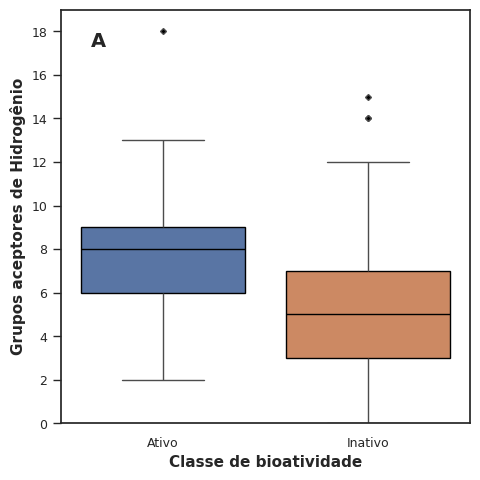

In [17]:
# Gráfico A - Boxplot: aceitadores de H vs classe
plt.figure(figsize=(5, 5))
ax = sns.boxplot(
    x='classe_bioatividade', y='nHBAcc', data=df_final,
    palette=custom_palette,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    flierprops=dict(markerfacecolor='black', marker='D', markersize=3, linestyle='none')
)

# Título "A" grande no canto superior esquerdo
plt.text(-0.35, df_final['nHBAcc'].max() * 0.48, 'A', fontsize=14, fontweight='bold')

# Ajustar rótulos dos eixos em português e em negrito
plt.xlabel('Classe de bioatividade', fontsize=11, fontweight='bold')
plt.ylabel('Grupos aceptores de Hidrogênio', fontsize=11, fontweight='bold')

# Diminuir o tamanho das categorias "Ativo" e "Inativo"
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

ax.set_yticks(np.arange(0, 19, 2))  # 18 para incluir 16
ax.set_ylim(0, 19)  # limitar até 16

# Tamanho dos ticks
ax.tick_params(axis='both', labelsize=9)

# Força a exibição de ticks no eixo Y
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(6)  # tamanho do tracinho

# Também ajusta o comprimento e direção
ax.tick_params(axis='y', which='both', length=6, direction='out', width=1)
plt.tight_layout()
plt.savefig("A.png", dpi=300, bbox_inches='tight')
plt.show()

### ***7. Gráfico B - Boxplot: doadores de H vs classe***

/tmp/ipython-input-18-3293657627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipython-input-18-3293657627.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


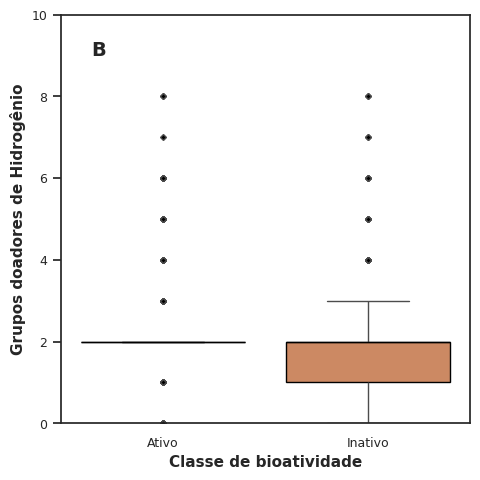

In [18]:
#Gráfico B - Boxplot: doadores de H vs classe
plt.figure(figsize=(5, 5))
ax = sns.boxplot(
    x='classe_bioatividade', y='nHBDon', data=df_final,
    palette=custom_palette,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    flierprops=dict(markerfacecolor='black', marker='D', markersize=3, linestyle='none')
)
plt.text(-0.35, df_final['nHBDon'].max() * 0.25, 'B', fontsize=14, fontweight='bold')
plt.xlabel('Classe de bioatividade', fontsize=11, fontweight='bold')
plt.ylabel('Grupos doadores de Hidrogênio', fontsize=11, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# Ajustar escala do eixo y (exemplo: até 10, ajuste conforme dados)
ax.set_yticks(np.arange(0, 12, 2))
ax.set_ylim(0, 10)
ax.tick_params(axis='both', labelsize=9)

# Força a exibição de ticks no eixo Y
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(6)  # tamanho do tracinho

plt.tight_layout()
plt.savefig("B.png", dpi=300, bbox_inches='tight')
plt.show()

### ***8. Gráfico C - Dispersão: LogP vs Massa Molecular***

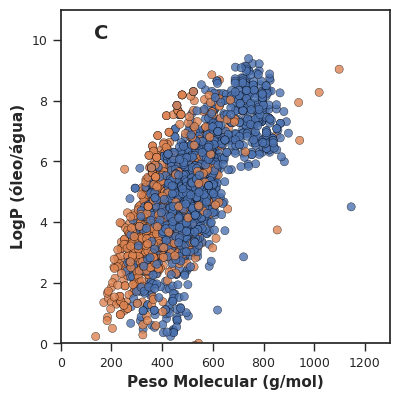

In [19]:
plt.figure(figsize=(4.2, 4.2))
ax = sns.scatterplot(
    data=df_final,
    x='MolWt', y='MolLogP',  # Invertido aqui
    hue='classe_bioatividade',
    palette=custom_palette,
    s=35, alpha=0.8,
    edgecolor='black', linewidth=0.3
)

# Letra "C"
plt.text(
    df_final['MolWt'].min() * 0.95, df_final['MolLogP'].max() * 0.84,
    'C', fontsize=14, fontweight='bold'
)

# Rótulos invertidos
plt.xlabel('Peso Molecular (g/mol)', fontsize=11, fontweight='bold')
plt.ylabel('LogP (óleo/água)', fontsize=11, fontweight='bold')

# Remover legenda
ax.legend().remove()

# Ticks com intervalos definidos
ax.set_xticks(np.arange(0, 1300, 200))  # Peso molecular no eixo X
ax.set_yticks(np.arange(0, 12, 2))        # LogP no eixo Y
ax.tick_params(axis='both', labelsize=9)

plt.xlim(0, 1300)
plt.ylim(0, 11)

# Garante ticks no eixo X (embaixo)
ax.tick_params(axis='x', which='both', bottom=True, top=False, length=6, direction='out', width=1)

# Garante ticks no eixo Y (esquerdo)
ax.tick_params(axis='y', which='both', left=True, right=False, length=6, direction='out', width=1)


plt.tight_layout()
plt.savefig("C.png", dpi=300, bbox_inches='tight')
plt.show()


### ***9. Gráfico D - Boxplot: LogP vs classe***

/tmp/ipython-input-20-1790834756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipython-input-20-1790834756.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)


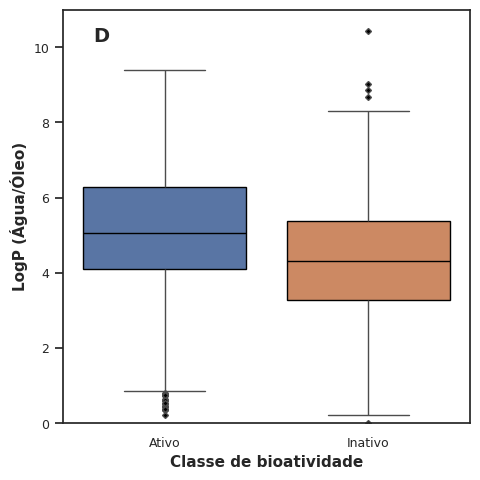

In [20]:
#Gráfico D - Boxplot: LogP vs classe
plt.figure(figsize=(5, 5))
ax = sns.boxplot(
    x='classe_bioatividade', y='MolLogP', data=df_final,
    palette=custom_palette,
    boxprops=dict(edgecolor='black'),
    medianprops=dict(color='black'),
    flierprops=dict(markerfacecolor='black', marker='D', markersize=3, linestyle='none')
)
plt.text(-0.35, df_final['MolLogP'].max() * 0.85, 'D', fontsize=14, fontweight='bold')
plt.xlabel('Classe de bioatividade', fontsize=11, fontweight='bold')
plt.ylabel('LogP (Água/Óleo)', fontsize=11, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

# Ajustar escala do eixo y (exemplo: de -2 a 8, ajuste conforme seus dados)
ax.set_yticks(np.arange(0, 11, 2))
ax.set_ylim(0, 11)
ax.tick_params(axis='both', labelsize=9)

# Força a exibição de ticks no eixo Y
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_markersize(6)  # tamanho do tracinho

plt.tight_layout()
plt.savefig("D.png", dpi=300, bbox_inches='tight')
plt.show()

### ***FIM***